In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
!pip install quandl

In [5]:
import quandl

In [6]:
 data =  quandl.get("NSE/TATAMOTORS")

In [7]:
data.head(10)

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,
2003-12-26,435.80,440.50,431.65,438.85,438.60,1534637.0,6714.66
2003-12-29,441.00,449.70,441.00,448.40,447.80,2125952.0,9497.72
2003-12-30,450.00,451.90,430.10,444.85,442.40,2683293.0,11894.85
2003-12-31,446.00,459.30,443.55,452.10,452.05,4311596.0,19551.42
2004-01-01,453.25,457.90,451.50,454.00,454.45,2077604.0,9457.51
2004-01-02,458.00,460.35,454.05,457.95,456.40,1704790.0,7795.88
2004-01-05,458.00,465.00,450.60,451.50,454.85,2141245.0,9767.85
2004-01-06,460.00,465.00,448.50,450.25,454.45,2360145.0,10850.57
2004-01-07,451.40,454.70,438.10,447.95,446.45,3766229.0,16707.04


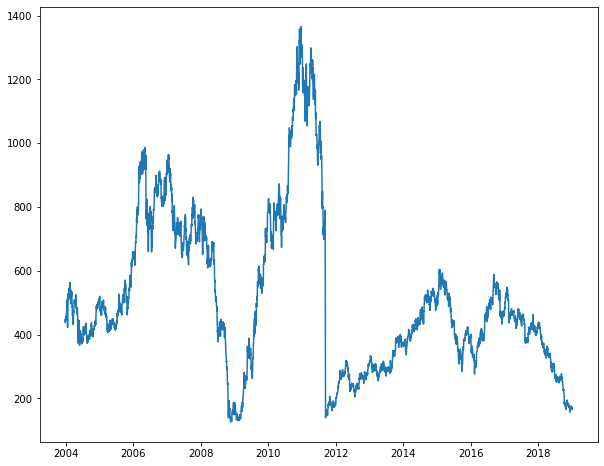

In [8]:
plt.figure(figsize=(10,8))
plt.plot(data['Close'], label='Closing Price')

In [9]:
data['Open - Close'] = data['Open'] - data['Close']
data['High - Low'] = data['High'] - data['Low']
data = data.dropna()

In [10]:
X = data[['Open - Close', 'High - Low']]
X.head()

,Open - Close,High - Low
Date,,
2003-12-26,-2.80,8.85
2003-12-29,-6.80,8.70
2003-12-30,7.60,21.80
2003-12-31,-6.05,15.75
2004-01-01,-1.20,6.40


In [11]:
Y = np.where(data['Close'].shift(-1)>data['Close'],1,-1)

In [12]:
Y

array([ 1, -1,  1, ..., -1,  1, -1])

In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.25, random_state = 44)

C:\Users\91867\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [15]:
params = {'n_neighbors':[2,3,4,5,6,7,8,9,10,11,12,13,14,15]}
knn= neighbors.KNeighborsClassifier()
model=GridSearchCV(knn,params, cv=5)

model.fit(x_train, y_train)

accuracy_train = accuracy_score(y_train, model.predict(x_train))
accuracy_test = accuracy_score(y_test, model.predict(x_test))

In [16]:
print ('Train_data Accuracy: %.2f' %accuracy_train)
print ('Test_data Accuracy: %.2f' %accuracy_test)

Train_data Accuracy: 0.76
Test_data Accuracy: 0.52


In [17]:
y= data['Close']

In [18]:
y


Date
2003-12-26    438.60
2003-12-29    447.80
2003-12-30    442.40
2003-12-31    452.05
2004-01-01    454.45
               ...  
2018-12-31    172.70
2019-01-01    173.45
2019-01-02    168.55
2019-01-03    166.05
2019-01-04    170.95
Name: Close, Length: 3734, dtype: float64

In [19]:
predictions_classification = model.predict(x_test) 
  

In [20]:
actual_predicted_data = pd.DataFrame({'Actual Class':y_test, ' Predicted Class':predictions_classification})
actual_predicted_data.head(10)  

,Actual Class,Predicted Class
0,-1,1
1,1,1
2,1,-1
3,1,1
4,-1,-1
5,-1,1
6,1,-1
7,-1,-1
8,1,1
9,1,-1


In [25]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn import neighbors

x_train_reg,x_test_reg,y_train_reg,y_test_reg=train_test_split(X,y,test_size=0.25, random_state=44)
params= {'n_neighbors':[2,3,4,5,6,7,8,9,10,11,12,13,14,15]}
knn_reg= neighbors.KNeighborsRegressor()
model_reg= GridSearchCV(knn_reg, params,cv=5)
model_reg.fit(x_train_reg, y_train_reg)
predictions=model_reg.predict(x_test_reg)

In [26]:
print(predictions)

[ 433.07857143  355.00357143  665.97142857  546.51071429  295.81428571
  537.51428571  723.95        661.775       515.38928571  651.58571429
  876.15        720.90714286  521.50357143  756.43214286  330.63571429
  307.96785714  399.63571429  343.05357143  669.62857143  810.70714286
  440.56071429  311.12857143  400.30357143  570.56071429  288.70714286
  904.18928571  393.85714286  690.44285714  727.13214286  709.12142857
  855.19642857  429.14285714  466.          504.12142857  418.86785714
  637.45357143  839.26785714  852.275       633.83928571  409.99642857
  329.26785714  415.44642857  315.54642857  636.81428571  690.41428571
  518.86428571  315.34285714  629.15357143  338.39285714  387.86071429
  633.34642857  873.75714286  653.31785714  477.60357143  503.94642857
  601.975       658.375       393.94642857  588.58214286  411.77857143
  678.38928571  390.92857143  659.43571429  319.43214286  382.02857143
  323.35357143  447.78571429  553.27142857  317.69285714  382.09642857
  375.

In [27]:
rms=np.sqrt(np.mean(np.power((np.array(y_test)-np.array(predictions)),2))) 

In [28]:
 rms

554.6741448610907

In [29]:
valid= pd.DataFrame({'Actual Close':y_test_reg, 'Predicted Close Value': predictions})

In [30]:
valid.head(10)

,Actual Close,Predicted Close Value
Date,,
2004-10-14,406.70,433.078571
2008-11-24,133.30,355.003571
2007-11-13,693.30,665.971429
2008-12-18,173.65,546.510714
2013-02-07,288.60,295.814286
2010-02-18,709.85,537.514286
2008-10-10,292.35,723.950000
2009-08-13,473.05,661.775000
2015-11-10,407.45,515.389286
